,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


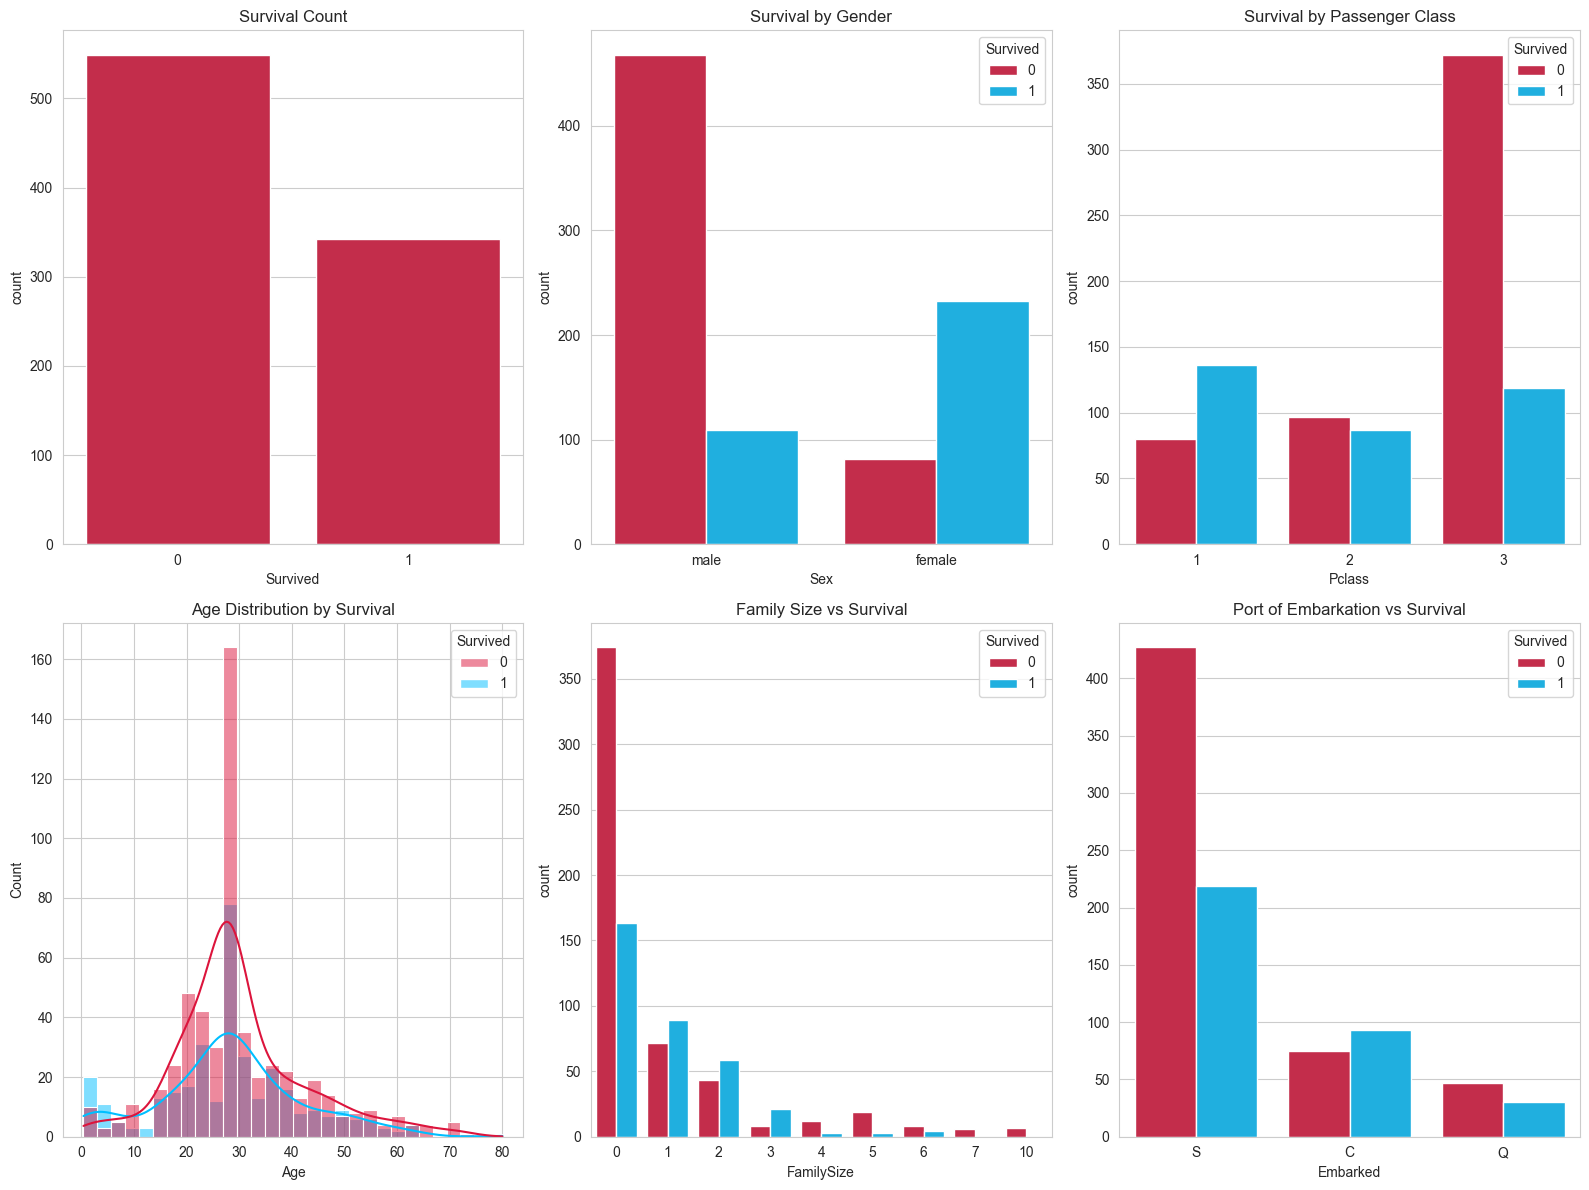

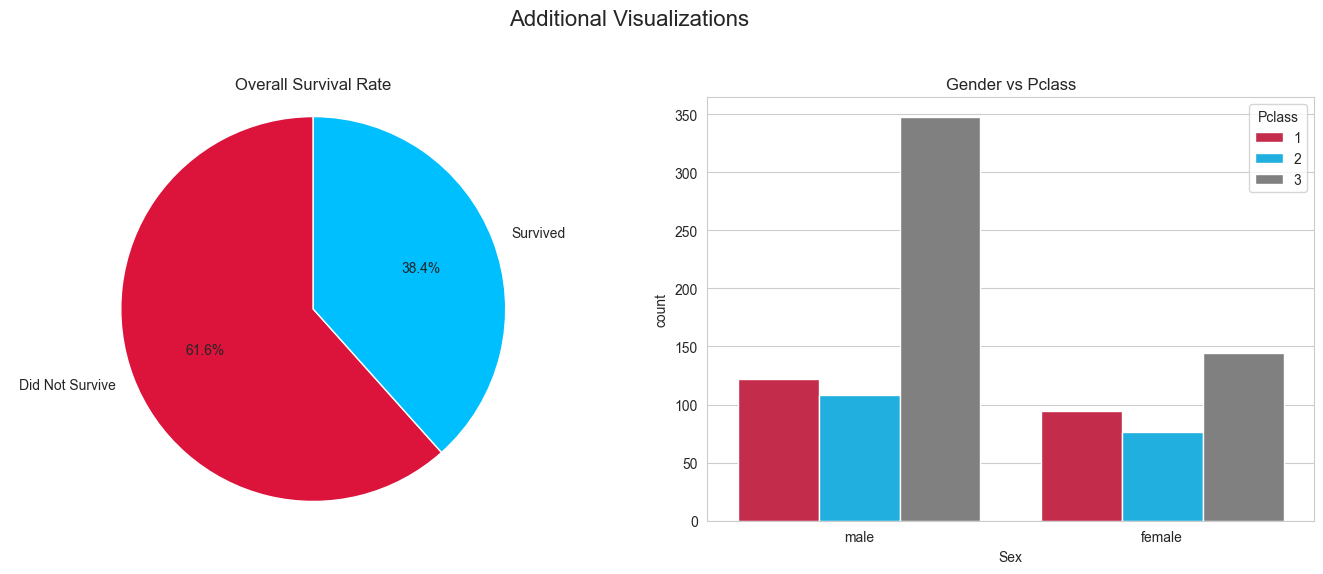

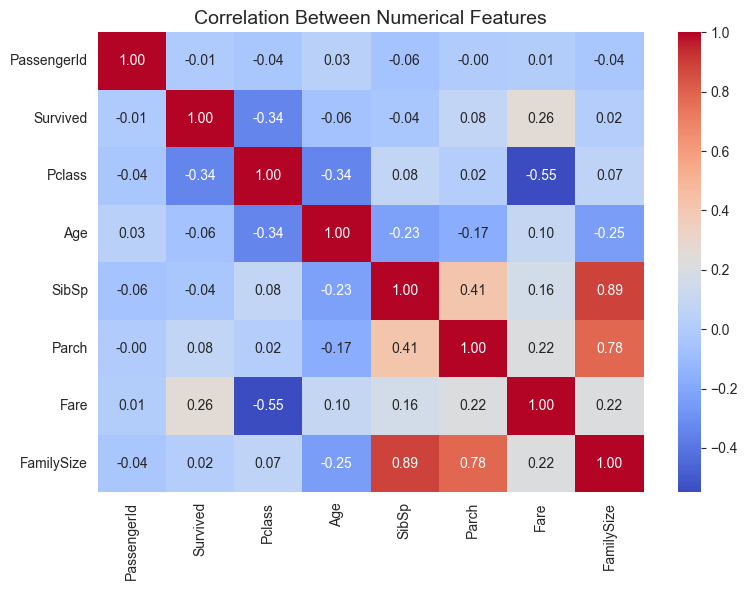

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display

%matplotlib inline

plt.style.use("default")
sns.set_style("whitegrid")
sns.set_palette(['crimson', 'deepskyblue'])

df = pd.read_csv('train.csv')

from IPython.display import HTML, display

display(df.head())
display(df.describe())
df.info()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])
df['FamilySize'] = df['SibSp'] + df['Parch']

df.describe().to_csv("describe.csv")
df.head().to_csv("head.csv", index=False)

with PdfPages("Titanic_EDA_Clean.pdf") as pdf:
    plt.figure(figsize=(16, 12))

    plt.subplot(2, 3, 1)
    sns.countplot(x='Survived', data=df)
    plt.title('Survival Count')

    plt.subplot(2, 3, 2)
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.title('Survival by Gender')

    plt.subplot(2, 3, 3)
    sns.countplot(x='Pclass', hue='Survived', data=df)
    plt.title('Survival by Passenger Class')

    plt.subplot(2, 3, 4)
    sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
    plt.title('Age Distribution by Survival')

    plt.subplot(2, 3, 5)
    sns.countplot(x='FamilySize', hue='Survived', data=df)
    plt.title('Family Size vs Survival')

    plt.subplot(2, 3, 6)
    sns.countplot(x='Embarked', hue='Survived', data=df)
    plt.title('Port of Embarkation vs Survival')

    plt.tight_layout()
    pdf.savefig()
    plt.show()
    plt.close()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Additional Visualizations', fontsize=16)

    survived_counts = df['Survived'].value_counts()
    labels = ['Did Not Survive', 'Survived']
    colors = ['crimson', 'deepskyblue']
    axes[0].pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Overall Survival Rate')
    axes[0].axis('equal')

    sns.countplot(data=df, x='Sex', hue='Pclass', palette=['crimson', 'deepskyblue', 'gray'], ax=axes[1])
    axes[1].set_title('Gender vs Pclass')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    pdf.savefig()
    plt.show()
    plt.close()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Between Numerical Features", fontsize=14)
    plt.tight_layout()
    pdf.savefig()
    plt.show()
    plt.close()